<a href="https://colab.research.google.com/github/NikzadaShafi/Real-Life-Data-Science-project/blob/main/Real_World_First_DataScience_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 **This is my first real life Data Science Project
I will use a source code and Youtube video to follow
the instruction on how to work with the data and answer
some questions.**

In [ ]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# To bring the data from a github repository
!git clone https://github.com/KeithGalli/Pandas-Data-Science-Tasks.git

In [ ]:
list_file = os.listdir('/content/Pandas-Data-Science-Tasks/SalesAnalysis/Sales_Data')

In [ ]:
# Merge the whole data 
Whole_data = pd.DataFrame()
for data in list_file:
  data_ = pd.read_csv('/content/Pandas-Data-Science-Tasks/SalesAnalysis/Sales_Data/'+ data)
  Whole_data = pd.concat([Whole_data,data_]) 

In [ ]:
# Sort the data based on the order
Whole_data = Whole_data.sort_values(by=['Order ID'])
# Clean data from NaN values
Whole_data = Whole_data.dropna(how='all')

**Question1: What was the best month for sales? how much was earned that month**

In [ ]:
# Further data cleaning, the data still contains unwanted values
Whole_data.drop(Whole_data[Whole_data['Order Date'] == 'Order Date'].index, inplace = True)

In [ ]:
# Create a new column from the first two character of Order Date (to extract month only)
Whole_data['Months'] = Whole_data['Order Date'].str[0:2]
# Convert str to int
Whole_data['Months'] = Whole_data['Months'].astype('int32')
Whole_data.head(5)


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Months
0,141234,iPhone,1,700,01/22/19 21:25,"944 Walnut St, Boston, MA 02215",1
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035",1
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016",1
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001",1
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301",1


In [ ]:
# Create a new column by multiplying quantity and price
Whole_data['Quantity Ordered'] = pd.to_numeric(Whole_data['Quantity Ordered'])
Whole_data['Price Each'] = pd.to_numeric(Whole_data['Price Each'])
Whole_data['Total_price'] = Whole_data['Quantity Ordered'] * Whole_data['Price Each']

In [ ]:
results = Whole_data.groupby('Months').sum()

<ipython-input-11-2677f4464907>:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])


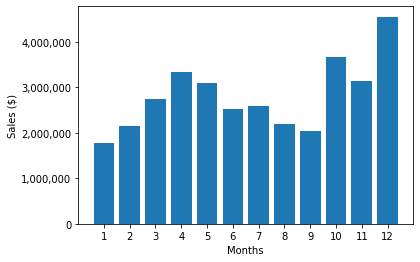

In [ ]:
# Creating a bar plot to see
months = range(1,13)
plt.bar(months, results['Total_price'])
plt.xticks(months)
plt.xlabel('Months')
plt.ylabel('Sales ($)')

# After plotting the data, format the labels
current_values = plt.gca().get_yticks()
# Using format string '{:.0f}' here but you can choose others
plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])
plt.show()

**Question2: What city had the highest number of sales**